In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split


In [3]:
df= pd.read_csv('Salary Data.csv')

In [15]:
df.head(10)

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0
5,29.0,Male,Bachelor's,Marketing Analyst,2.0,55000.0
6,42.0,Female,Master's,Product Manager,12.0,120000.0
7,31.0,Male,Bachelor's,Sales Manager,4.0,80000.0
8,26.0,Female,Bachelor's,Marketing Coordinator,1.0,45000.0
9,38.0,Male,PhD,Senior Scientist,10.0,110000.0


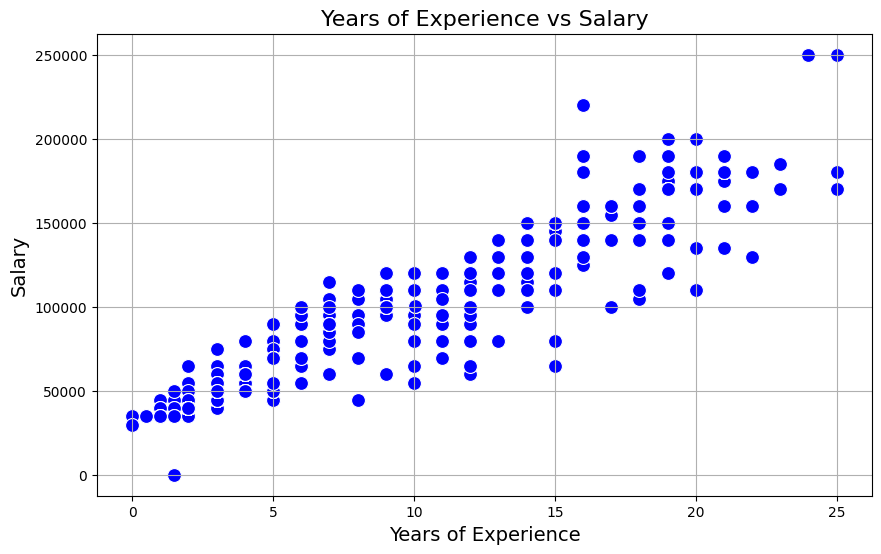

In [37]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='Years of Experience', y='Salary', color='blue', s=100)
plt.title('Years of Experience vs Salary', fontsize=16)
plt.xlabel('Years of Experience', fontsize=14)
plt.ylabel('Salary', fontsize=14)
plt.grid(True)

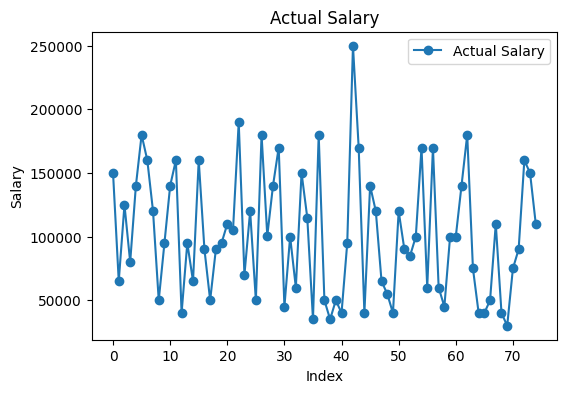

In [38]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
plt.plot(y_test.values, label='Actual Salary', marker='o')
plt.title("Actual Salary")
plt.xlabel("Index")
plt.ylabel("Salary")
plt.legend()
plt.show()


In [39]:
df.isnull().sum()

Age                    0
Gender                 0
Education Level        0
Job Title              0
Years of Experience    0
Salary                 0
dtype: int64

In [23]:
 
cat_cols = ['Gender', 'Education Level', 'Job Title']

for col in cat_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)

# numerical column
df['Age'].fillna(df['Age'].mean(), inplace=True)
df['Years of Experience'].fillna(df['Years of Experience'].mean(), inplace=True)
df['Salary'].fillna(df['Salary'].mean(), inplace=True)



/var/folders/xk/h_d6ynjn4_dct7skwzcdhl4c0000gn/T/ipykernel_5900/765345309.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(), inplace=True)
/var/folders/xk/h_d6ynjn4_dct7skwzcdhl4c0000gn/T/ipykernel_5900/765345309.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always b

In [24]:
df_encoded = pd.get_dummies(
    df,
    columns=['Gender', 'Education Level', 'Job Title'],
    drop_first=True    
)


In [25]:
X = df_encoded.drop('Salary', axis=1)
y = df_encoded['Salary']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [26]:
from sklearn.linear_model import LinearRegression
model= LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [30]:
model.intercept_
model.coef_

array([ 2.25837301e+03,  1.69294421e+03,  8.41583623e+02,  4.86617969e+03,
        1.29697930e+04, -1.55604292e+04, -4.37045749e+04, -3.89467217e+03,
        1.84911579e+02, -8.63771198e+02,  3.78349796e-10,  8.59540144e+04,
        8.43434766e+04, -1.16091120e+04, -4.12001100e-10,  2.80184584e+03,
       -1.76310593e+04, -1.89826324e+04, -2.72533734e+04,  1.01863407e-10,
       -1.41897315e+04, -1.76026913e+04, -1.52384143e+04,  4.94149769e+03,
       -1.66091120e+04, -1.13928853e+04,  4.92188668e+04,  3.22036761e+04,
        4.67204221e+04,  3.45771965e+04,  3.90939425e+04,  3.51426253e+04,
        3.23811284e+04,  3.42167520e+04,  2.65699385e+04,  3.15594147e+04,
        4.17204221e+04,  2.30876947e+04, -3.58413567e+04,  2.64060679e+03,
       -1.88213933e+04,  2.59115794e+04, -1.43507390e+04, -2.70904633e+04,
       -8.54166471e+03, -1.60799979e+04, -1.83263182e-10, -1.06717712e+04,
       -1.13686838e-11, -2.77727106e+04, -1.67471894e+04, -1.83777873e+04,
       -2.24506956e+04, -

In [31]:
y_pred= model.predict(X_test)
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mae= mean_absolute_error(y_test, y_pred)
mse= mean_squared_error(y_test, y_pred)
rmse= np.sqrt(mse)
r2= r2_score(y_test, y_pred)
print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'R²: {r2}')


MAE: 11844.820295511943
MSE: 336851632.1001277
RMSE: 18353.51824855735
R²: 0.8609486071451841


In [35]:
comparison = pd.DataFrame({
    'Actual Salary (y_test)': y_test.values,
    'Predicted Salary (y_pred)': y_pred
})

comparison.head()


,Actual Salary (y_test),Predicted Salary (y_pred)
0,150000.0,141948.620027
1,65000.0,98785.078596
2,125000.0,121076.192541
3,80000.0,100000.000000
4,140000.0,132498.213099


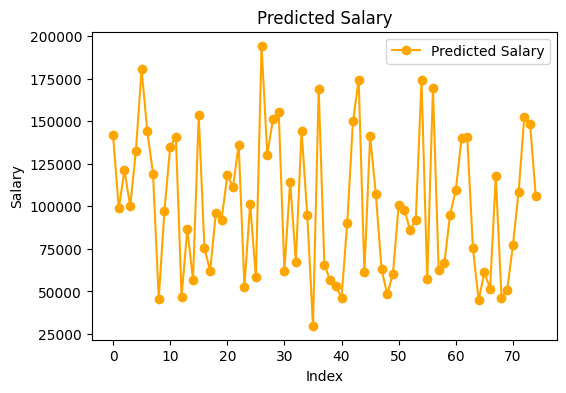

In [40]:
plt.figure(figsize=(6,4))
plt.plot(y_pred, label='Predicted Salary', marker='o', color='orange')
plt.title("Predicted Salary")
plt.xlabel("Index")
plt.ylabel("Salary")
plt.legend()
plt.show()


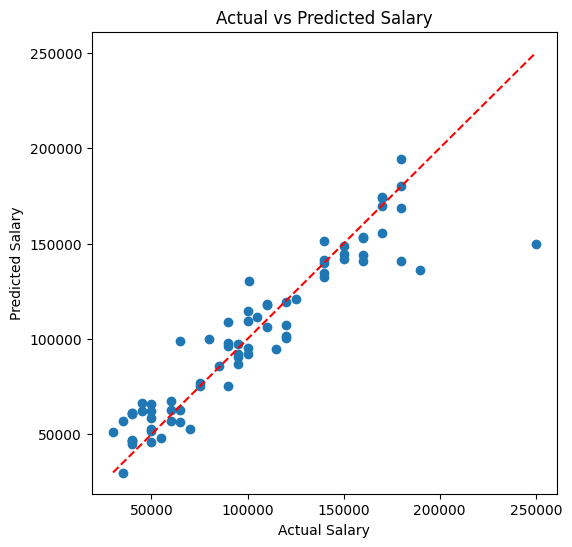

In [41]:
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         'r--')
plt.xlabel("Actual Salary")
plt.ylabel("Predicted Salary")
plt.title("Actual vs Predicted Salary")
plt.show()


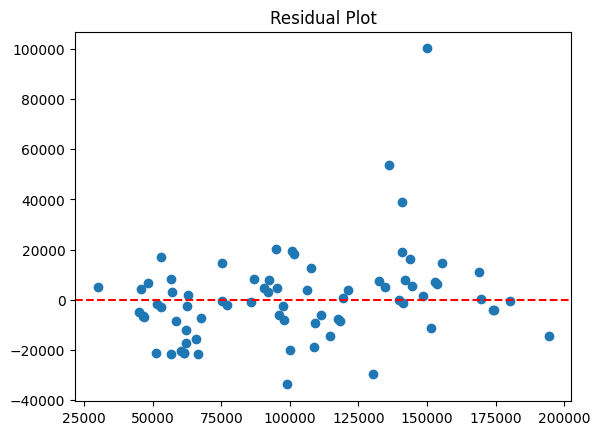

In [46]:
residuals = y_test - y_pred
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.title("Residual Plot")
plt.show()